## 0. Projektsetup & Datenüberblick
 **0.1 Einführung**

Dieses Projekt untersucht historische E-Commerce-Daten, um Kundenverhalten, Umsatzverteilung und Produktprofitabilität besser zu verstehen.
Die gewonnenen Erkenntnisse bilden die Basis für weiterführende analytische und prädiktive Auswertungen.

**0.2 Data Loading & Initial Exploration**

In [81]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import os

import statsmodels.formula.api as smf

## from
from matplotlib.colors import LinearSegmentedColormap
from statsmodels.tsa.seasonal import STL

import textwrap

#from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [82]:
#plt.style.use('default')
plt.style.use("seaborn-v0_8")
plt.style.use("seaborn-v0_8-ticks")


In [83]:
df = pd.read_csv("../data/clean/aggregate_df.csv")

df_customers = pd.read_csv("../data/clean/customers.csv")
df_orders = pd.read_csv("../data/clean/orders.csv")
df_items = pd.read_csv("../data/clean/order_items.csv")
df_products = pd.read_csv("../data/clean/products.csv")

In [84]:
print("=== MAIN DF ===")
df.info()
print("\n=== CUSTOMERS ===")
df_customers.info()
print("\n=== ORDERS ===")
df_orders.info()
print("\n=== ORDER ITEMS ===")
df_items.info()
print("\n=== PRODUCTS ===")
df_products.info()

=== MAIN DF ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.company              4194 non-null   object 
 4   Customers.create_date          4194 non-null   object 
 5   Customers.mailing              4194 non-null   int64  
 6   Customers.last_modified        4194 non-null   object 
 7   Orders.id                      4194 non-null   int64  
 8   Orders.customer_id             4194 non-null   int64  
 9   Orders.company                 730 non-null    object 
 10  Orders.order_number            4194 non-null   object 
 11  Orders.reorder_id              82 non-null     float64
 12  Orders.subtotal                4

In [85]:
display(
    "=== CUSTOMERS ===",
    df_customers.describe().round(2).T,
    df_customers.shape,


    "=== ORDERS ===",
    df_orders.describe().round(2).T,
    df_orders.shape,

    "=== ORDER ITEMS ===",
    df_items.describe().round(2).T,
    df_items.shape,


    "=== PRODUCTS ===",
    df_products.describe().round(2).T,
    df_products.shape
    )



'=== CUSTOMERS ==='

,count,mean,std,min,25%,50%,75%,max
Customers.id,3054.0,1899.90,1073.24,3.0,972.25,1926.5,2818.75,3736.0
Customers.mailing,3054.0,0.46,0.50,0.0,0.00,0.0,1.00,1.0


(3054, 7)

'=== ORDERS ==='

,count,mean,std,min,25%,50%,75%,max
Orders.id,3565.0,9036.67,5311.46,23.00,4177.00,9398.00,13973.00,17437.00
Orders.customer_id,3565.0,1793.49,1076.45,3.00,851.00,1751.00,2713.00,3736.00
Orders.reorder_id,63.0,7549.14,3656.41,30.00,4673.00,6887.00,11014.50,16201.00
Orders.subtotal,3565.0,109.82,206.22,2.89,32.63,63.61,124.74,5163.04
Orders.tax,3159.0,0.67,4.10,0.00,0.00,0.00,0.00,132.93
Orders.shipping,3390.0,7.22,4.51,0.00,0.00,9.95,9.95,32.81
Orders.coupon_id,640.0,20.59,11.65,4.00,12.00,26.00,32.00,48.00
Orders.coupon_amount,640.0,9.20,14.51,0.00,1.52,5.00,10.76,109.90
Orders.discount_amount,343.0,13.46,52.82,0.02,3.43,6.71,9.95,588.04
Orders.total,3565.0,115.37,195.56,2.89,39.99,70.74,129.96,4627.95


(3565, 24)

'=== ORDER ITEMS ==='

,count,mean,std,min,25%,50%,75%,max
Order_Items.id,4194.0,11156.07,5802.47,31.00,5847.25,11770.00,16482.75,20202.0
Order_Items.parent,4194.0,9142.98,5276.54,23.00,4258.00,9641.00,14011.75,17437.0
Order_Items.product_id,4151.0,4451.43,5577.39,1.00,1009.00,1867.00,4345.50,26175.0
Order_Items.qty,4194.0,1.86,8.82,1.00,1.00,1.00,1.00,500.0
Order_Items.price,4194.0,67.35,95.57,1.12,24.03,43.46,74.99,1899.0
Order_Items.cost,4194.0,51.09,74.13,0.28,16.20,32.50,59.50,1350.0
Order_Items.reorder_frequency,24.0,1.67,0.92,1.00,1.00,1.00,2.00,4.0


(4194, 8)

'=== PRODUCTS ==='

,count,mean,std,min,25%,50%,75%,max
Products.id,1710.0,6266.13,6393.83,1.00,1324.50,3078.50,11310.00,26175.00
Products.import_id,1710.0,3.83,2.84,1.00,3.00,3.00,4.00,21.00
Products.list_price,1692.0,127.08,333.87,1.02,27.40,58.01,116.38,8439.00
Products.price,1709.0,71.70,124.22,1.54,21.05,39.68,71.72,1899.00
Products.sale_price,146.0,67.43,97.96,2.89,19.03,39.97,69.88,659.99
Products.cost,1710.0,52.65,93.95,0.28,12.50,27.99,53.83,1350.00
Products.case_qty,831.0,181.09,538.76,1.00,1.00,6.00,80.00,5000.00


(1710, 16)

In [86]:
### ---  Column structuring --- 

id_cols = ['Customers.id', 'Orders.id', 'Orders.customer_id', 'Orders.order_number', 'Orders.reorder_id',
           'Orders.coupon_id', 'Orders.reorder_id',
          'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id', 
          'Products.id',  'Products.import_id', 'Products.family_id'
        ]		


text_cols = ['Customers.fname', 'Customers.lname', 'Customers.company', 
            'Orders.company', 'Orders.discount_name', 'Orders.shipping_method', 
            'Order_Items.product_name', 
            'Products.shopping_color'
            ]

integer_cols = ['Customers.mailing', 'Order_Items.qty']


category_cols = ['Orders.shipping_carrier', 'Orders.shipping_method', 'Orders.discount_name',
                'Orders.payment_method', 'Orders.payment_status', 'Orders.status', 
                'Products.status', 'Products.vendor', 'Products.shopping_brand', 'Products.taxable'
                ]

date_cols = ['Orders.placed_date', 'Orders.payment_date', 'Orders.updated_date',
             'Orders.shipped_date', 'Customers.create_date', 'Customers.last_modified'
             ]

In [87]:
dfs = [df, df_orders, df_customers, df_items, df_products]

for data in dfs:
    for col in id_cols:
        if col in data.columns:
            data[col] = data[col].astype("object")

    for col in category_cols:
        if col in data.columns:
            data[col] = data[col].astype("category")

    for col in integer_cols:
        if col in data.columns:
            data[col] = data[col].astype("int64")

    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')



## **PART 1: Kundenanalyse**

**1.1 Kundensegmentierung**

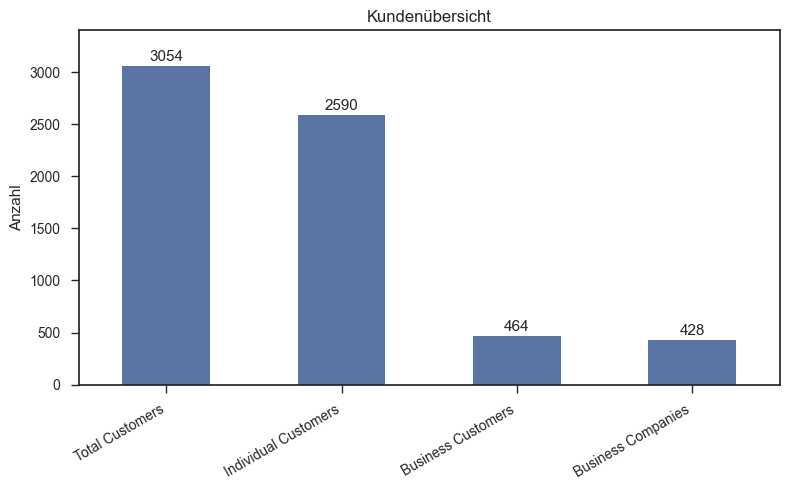

In [237]:

metrics = {
    "Total Customers": df_customers['Customers.id'].nunique(),
    "Business Customers": (df_customers['Customers.company'] != "Individual").sum(),
    "Business Companies": df_customers['Customers.company'].nunique() - 1,
    "Individual Customers": (df_customers['Customers.company'] == "Individual").sum()
}

df_metrics = pd.DataFrame(list(metrics.items()), columns=["Category", "Count"])

# metrics = {
#     "Total Customers": df_customers['Customers.id'].nunique(),
#     "Individual Customers": (~df_customers['is_business']).sum(),
#     "Business Customers": (df_customers['is_business']).sum(),
#     "Business Companies": (
#         df_customers.loc[df_customers['is_business'], 'Customers.company']
#         .nunique()
#     )
# }

# df_metrics = pd.DataFrame(
#     list(metrics.items()),
#     columns=["Category", "Count"]
# )

# Desired order
order = [
    "Total Customers",
    "Individual Customers",
    "Business Customers",
    "Business Companies"
]
# ===================
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_metrics,
    x="Category",
    y="Count",
    width=0.5,
 #   color="#2f8ec1",
    order=order
)

# Add labels
for index, row in df_metrics.set_index("Category").loc[order].iterrows():
    plt.text(order.index(index), row["Count"] + 50, str(row["Count"]),
             ha='center', fontsize=11)

plt.ylim(0, 3400)
plt.title("Kundenübersicht")
plt.ylabel("Anzahl")
plt.xlabel("")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [166]:
df['is_business'] = df['Customers.company'] != "Individual"

orders_comp_unique = (
    df
    .drop_duplicates(subset="Orders.id")
    .loc[:, ["Orders.id", "Orders.total", "is_business"]]
)

individual_revenue = orders_comp_unique.loc[~orders_comp_unique['is_business'], 'Orders.total'].sum()
business_revenue   = orders_comp_unique.loc[orders_comp_unique['is_business'],  'Orders.total'].sum()

print(f"Umsatz (Privatkunden): {individual_revenue:,.2f} USD")
print(f"Umsatz (Geschäftskunden): {business_revenue:,.2f} USD")




Umsatz (Privatkunden): 308,740.34 USD
Umsatz (Geschäftskunden): 102,538.42 USD


In [241]:
total_revenue = individual_revenue + business_revenue

print("Anteil Privatkunden:", round(individual_revenue / total_revenue * 100, 2), "%")
print("Anteil Geschäftskunden:", round(business_revenue / total_revenue * 100, 2), "%")

# sizes = [individual_revenue, business_revenue]
# labels = ["B2C (Individual)", "B2B (Business)"]

# plt.figure(figsize=(4, 4))
# plt.pie(
#     sizes,
#     labels=labels,
#     autopct='%1.2f%%',
#     startangle=90,
#     colors=["#66c2a5", "#3288bd"],
#     wedgeprops={'width': 0.4}
# )

# plt.title("Umsatzverteilung: B2C vs. B2B")
# plt.show()

Anteil Privatkunden: 75.07 %
Anteil Geschäftskunden: 24.93 %


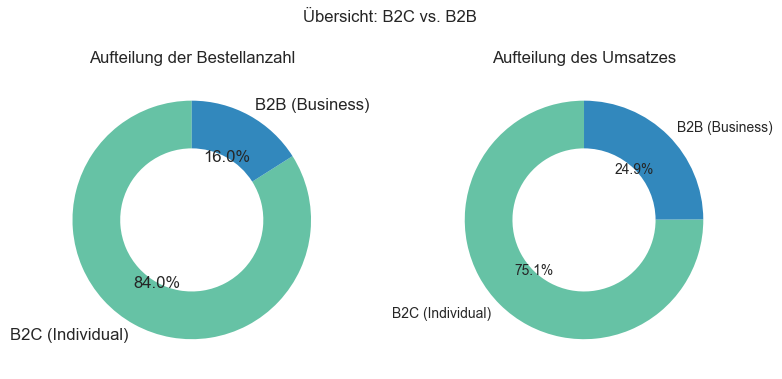

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

colors = ["#66c2a5", "#3288bd"]
labels = ["B2C (Individual)", "B2B (Business)"]

# --- 1. Order count split ---
order_counts = orders_comp_unique['is_business'].value_counts().sort_index()
axes[0].pie(
    [order_counts[False], order_counts[True]],
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4},
    textprops={'fontsize': 12}
)
axes[0].set_title("Aufteilung der Bestellanzahl")

# --- 2. Revenue split ---
axes[1].pie(
    [individual_revenue, business_revenue],
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4}
)
axes[1].set_title("Aufteilung des Umsatzes")

plt.suptitle("Übersicht: B2C vs. B2B", fontsize=12)
plt.tight_layout()
plt.show()


In [91]:
# === customer data
customer_counts = (
    df
    .drop_duplicates(subset='Customers.id')
    .groupby('is_business')
    .size()
    .reset_index(name='customer_count')
)

# ==== order data
orders_with_flag = (
    df
    .drop_duplicates(subset='Orders.id')
    .loc[:, ['Orders.id', 'Orders.total', 'is_business']]
)


mean_values = (
    orders_with_flag
    .groupby('is_business')['Orders.total']
    .mean()
    .reset_index(name='mean_order_value')
)

order_counts = (
    orders_with_flag
    .groupby('is_business')['Orders.id']
    .count()
    .reset_index(name='order_count')
)

total_spent = (
    orders_with_flag
    .groupby('is_business')['Orders.total']
    .sum()
    .reset_index(name='total_spent')
)

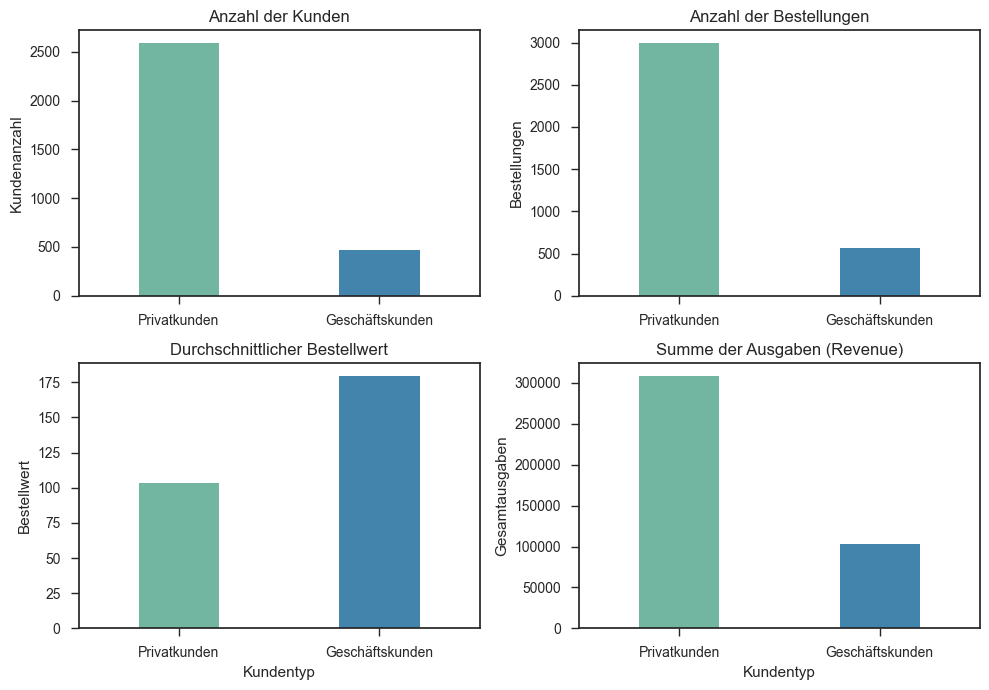

In [238]:
palette = {
    False: '#66c2a5',  # Individual - Privatkunden
    True:  '#3288bd'   # Business - Geschäftskunden
}

labels = {False: 'Privatkunden', True: 'Business'}


fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# === 1. CUSTOMER COUNT ===
sns.barplot(
    data=customer_counts,
    x='is_business', y='customer_count',
    hue='is_business', palette=palette,
    legend=False, width=0.4, 
    ax=axes[0, 0]
)
axes[0, 0].set_title("Anzahl der Kunden")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Kundenanzahl")
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Privatkunden', 'Geschäftskunden'])

# === 2. ORDER COUNT ===
sns.barplot(
    data=order_counts,
    x='is_business', y='order_count',
    hue='is_business', palette=palette,
    legend=False, width=0.4,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Anzahl der Bestellungen")
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("Bestellungen")
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['Privatkunden', 'Geschäftskunden'])


# === 3. MEAN ORDER VALUE ===
sns.barplot(
    data=mean_values,
    x='is_business', y='mean_order_value',
    hue='is_business', palette=palette,
    legend=False, width=0.4,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Durchschnittlicher Bestellwert")
axes[1, 0].set_xlabel("Kundentyp")
axes[1, 0].set_ylabel("Bestellwert")
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Privatkunden', 'Geschäftskunden'])


# === 4. TOTAL SPENT ===
sns.barplot(
    data=total_spent,
    x='is_business', y='total_spent',
    hue='is_business', palette=palette,
    legend=False, width=0.4,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Summe der Ausgaben (Revenue)")
axes[1, 1].set_xlabel("Kundentyp")
axes[1, 1].set_ylabel("Gesamtausgaben")
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Privatkunden', 'Geschäftskunden'])


plt.tight_layout()
plt.show()


**1.2 RFM Analysis**

In [93]:
df['Orders.placed_date'] = pd.to_datetime(df['Orders.placed_date'], errors='coerce')#прибрати!!!!

#=================== 1. Reference date

reference_date = df['Orders.placed_date'].max()

#=================== 2. Підготовка окремої таблиці замовлень без дублювання

orders_unique = df.drop_duplicates(subset='Orders.id').copy()

# Для коректності — гарантуємо правильні типи
orders_unique['Orders.total'] = pd.to_numeric(orders_unique['Orders.total'], errors='coerce')
orders_unique['Orders.placed_date'] = pd.to_datetime(orders_unique['Orders.placed_date'], errors='coerce')

#=================== 3. Обчислення RFM

# Recency — коли клієнт востаннє зробив замовлення
recency = (reference_date - orders_unique.groupby('Customers.id')['Orders.placed_date'].max()).dt.days
recency = recency.rename('Recency_days')

# Frequency — кількість унікальних замовлень
frequency = orders_unique.groupby('Customers.id')['Orders.id'].nunique()
frequency = frequency.rename('Frequency_orders')

# Monetary — сума унікальних замовлень
monetary = orders_unique.groupby('Customers.id')['Orders.total'].sum()
monetary = monetary.rename('Monetary_total')

#=================== 4. Об'єднання в RFM таблицю
rfm = pd.concat([recency, frequency, monetary], axis=1).reset_index()

print(rfm.head())
print(rfm.shape)

   Customers.id  Recency_days  Frequency_orders  Monetary_total
0             3           159                 2          108.72
1             4           887                 1           29.55
2             5           614                 3          124.99
3             7           871                 1           49.14
4             8           857                 1           69.70
(3054, 4)


C:\Users\Anna\AppData\Local\Temp\ipykernel_19268\3634369400.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = rfm.pivot_table(


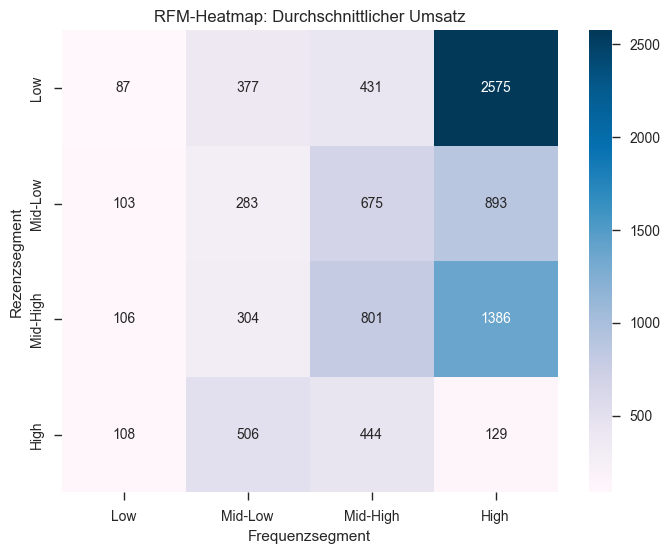

In [94]:
# Recency bins - qcut OK
rfm['Recency_bin'] = pd.qcut(
    rfm['Recency_days'], 
    q=4,
    labels=['Low', 'Mid-Low', 'Mid-High', 'High'],
    duplicates='drop'
)

# Frequency bins – manual to avoid duplicates
rfm['Frequency_bin'] = pd.cut(
    rfm['Frequency_orders'],
    bins=[0, 1, 3, 6, 100],
    labels=['Low', 'Mid-Low', 'Mid-High', 'High']
)

# Pivot for heatmap
pivot = rfm.pivot_table(
    values='Monetary_total',
    index='Recency_bin',
    columns='Frequency_bin',
    aggfunc='mean'
)
#===================
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='PuBu')
plt.title("RFM-Heatmap: Durchschnittlicher Umsatz") #Average Value #Обсяг 
plt.xlabel("Frequenzsegment") #Frequency Segment  #Частотний сегмент
plt.ylabel("Rezenzsegment")     #Recency Segment    #Сегмент нещодавності
plt.show()

2D RFM segmentation:

**<ins>Segment              Characteristics</ins>**

Champions          Low Recency + High Frequency

Loyal                    Mid-Low Recency + Mid-High Frequency

At Risk                 High Recency + High Frequency

Lost                      High Recency + Low Frequency

In [174]:
## Total Customer Revenue by RFM Segment (Recency x Frequency)

print("-----------------------------------------------------\n")
print("          Total Customer Revenue by RFM Segment\n")
pivot_sum = rfm.pivot_table(
    values='Monetary_total',
    index='Recency_bin',
    columns='Frequency_bin',
    aggfunc='sum',
    observed=True
)
pivot_sum

-----------------------------------------------------

          Total Customer Revenue by RFM Segment



Frequency_bin,Low,Mid-Low,Mid-High,High
Recency_bin,,,,
Low,60517.10,19249.33,3448.83,38624.11
Mid-Low,72715.32,13861.52,4050.46,2678.98
Mid-High,74541.29,13356.60,7210.03,4159.14
High,78314.26,16204.61,2218.45,128.73


Key Customer Segments (RFM-based):

Champions – 25% (recent & frequent buyers)

Loyal Customers – 25% (frequent, slightly less recent)

At Risk – ~20% (previously engaged customers with declining recency) — $56,894 in historical revenue at risk

Others – ~30% (low engagement or one-time buyers)

**1.3 Kundenlebenszeitwert (CLV - Customer Lifetime Value)**

In [95]:
#Historical CLV
rfm['CLV'] = rfm['Monetary_total']

#CLV (High / Medium / Low) 0.33 та 0.66
rfm['CLV_segment'] = pd.qcut(rfm['CLV'], q=3, labels=['Low', 'Medium', 'High'])

In [96]:
#at risk
# "high recency" = no bay long time -> risk 
# top 20% Recency

threshold = rfm['Recency_days'].quantile(0.80)
rfm['At_risk'] = (rfm['Recency_days'] > threshold).astype(int)


rfm['High_value_at_risk'] = ((rfm['CLV_segment'] == 'High') & 
                             (rfm['At_risk'] == 1)).astype(int)

In [97]:
rfm_sorted = rfm.sort_values('CLV', ascending=False)
top20 = rfm_sorted.head(int(0.2 * len(rfm_sorted)))
top20_revenue_share = top20['CLV'].sum() / rfm['CLV'].sum()
print(f"Die Top-20% der Kunden generieren {top20_revenue_share:.2%} des Umsatzes.")


Die Top-20% der Kunden generieren 61.78% des Umsatzes.


In [98]:
lost_clv = rfm[rfm['High_value_at_risk'] == 1]['CLV'].sum()
#print(f"At Risk segment has ${lost_clv:,.0f} CLV at stake")
print(f"Im At-Risk Segment stehen {lost_clv:,.0f}$ CLV auf dem Spiel.")

Im At-Risk Segment stehen 56,894$ CLV auf dem Spiel.


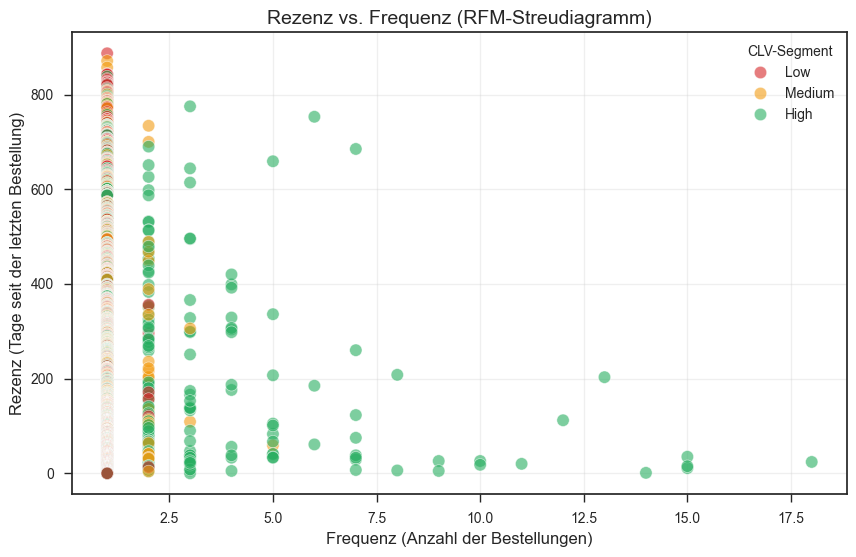

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x='Frequency_orders',
    y='Recency_days',
    hue='CLV_segment',
    palette={'Low': '#d62728', 'Medium': '#f39c12', 'High': '#27ae60'}, 
    alpha=0.6, 
    s=80,
    linewidth=0.5
)

# Додати jitter для X axis (де overplotting)
#rfm['Frequency_jitter'] = rfm['Frequency_orders'] + np.random.uniform(-0.2, 0.2, len(rfm))

plt.title("Rezenz vs. Frequenz (RFM-Streudiagramm)", fontsize=14)
plt.xlabel("Frequenz (Anzahl der Bestellungen)", fontsize=12) #Frequency (Number of Orders) #Частота
plt.ylabel("Rezenz (Tage seit der letzten Bestellung)", fontsize=12) #Recency (Days Since Last Order) #Недавність
plt.legend(title="CLV-Segment")
plt.grid(alpha=0.3)
plt.show()
#скільки раз клієнт зробив замовлення і скільки днів прошло з останнього

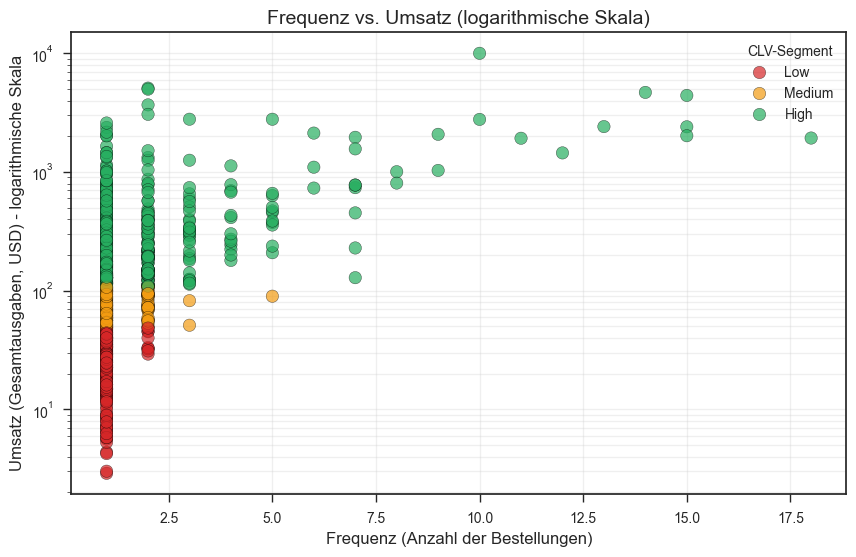

In [100]:
# КРАЩЕ: Log scale для Y axis
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm,
    x='Frequency_orders',
    y='Monetary_total',
    hue='CLV_segment',
    palette={'Low': '#d62728', 'Medium': '#f39c12', 'High': '#27ae60'},  
    alpha=0.7,
    s=80,
    edgecolor='black',
    linewidth=0.3
)

plt.yscale('log')  # ← LOG SCALE!
plt.title("Frequenz vs. Umsatz (logarithmische Skala)", fontsize=14) #(Log Scale)
plt.xlabel("Frequenz (Anzahl der Bestellungen)", fontsize=12)
plt.ylabel("Umsatz (Gesamtausgaben, USD) - logarithmische Skala", fontsize=12)   #Monetary (Total Spend, USD) - Log Scale
plt.legend(title="CLV-Segment", fontsize=10, loc='upper right')
plt.grid(alpha=0.3, which='both')
plt.show()

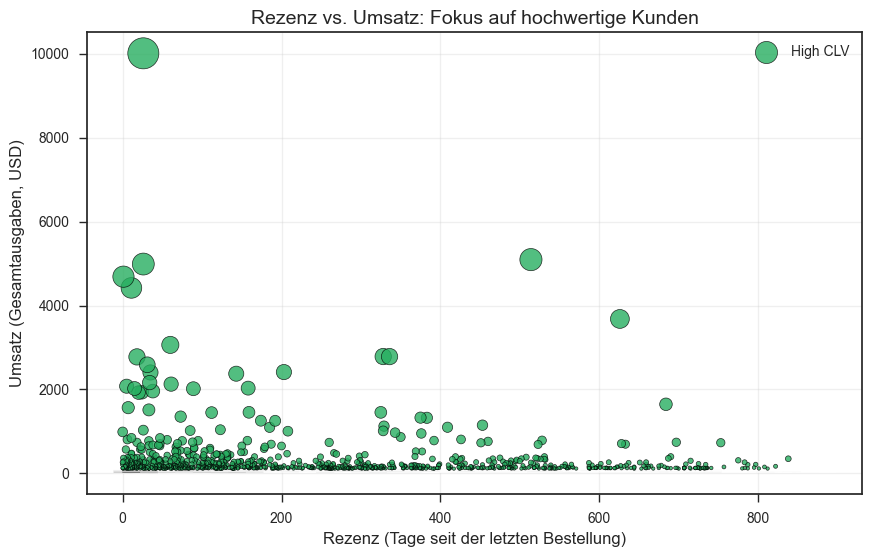

In [101]:
plt.figure(figsize=(10,6))

# 1. Density для Low/Medium (щоб показати концентрацію)
low_med = rfm[rfm['CLV_segment'].isin(['Low', 'Medium'])]
plt.hexbin(low_med['Recency_days'], low_med['Monetary_total'], 
           gridsize=40, cmap='Greys', alpha=0.5, mincnt=1, zorder=1)

# 2. Scatter тільки для High CLV (щоб виділити їх)
high = rfm[rfm['CLV_segment'] == 'High']
plt.scatter(high['Recency_days'], high['Monetary_total'], 
            c='#27ae60', s=high['Monetary_total']/20, 
            alpha=0.8, edgecolor='black', linewidth=0.5, 
            label='High CLV', zorder=2)
                                                                    # fontweight='bold'
plt.title(label="Rezenz vs. Umsatz: Fokus auf hochwertige Kunden", fontsize=14) #Recency vs Monetary: Focus on High-Value Customers
plt.xlabel("Rezenz (Tage seit der letzten Bestellung)", fontsize=12) #Recency (Days Since Last Order)
plt.ylabel("Umsatz (Gesamtausgaben, USD)", fontsize=12)  #Monetary (Total Spend, USD)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

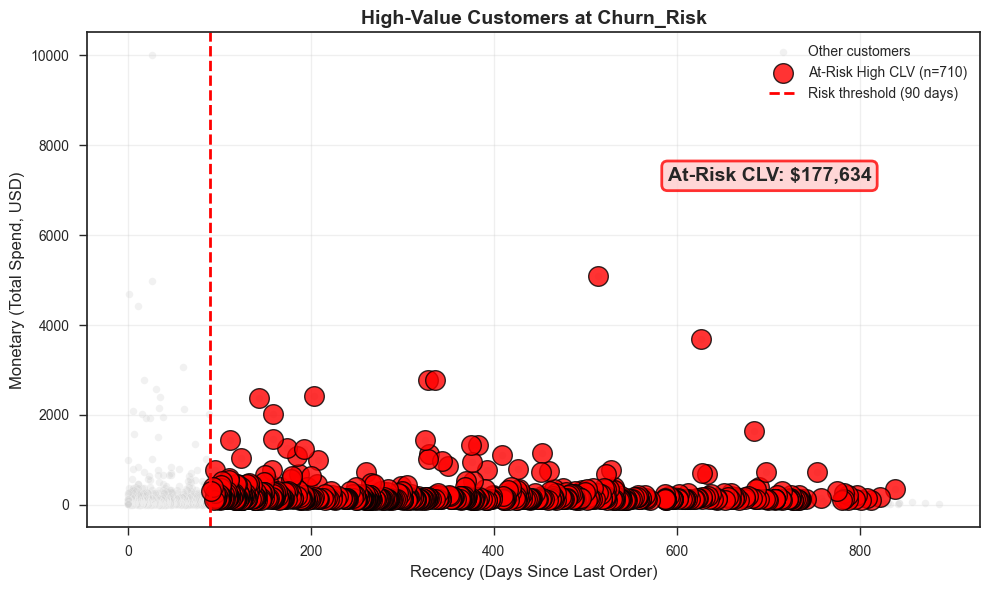

In [ ]:
# ЦЕЙ CHART:
at_risk_high = rfm[(rfm['CLV_segment'] == 'High') & (rfm['Recency_days'] > 90)]

plt.figure(figsize=(10,6))

# Background: всі інші customers (сірі, прозорі)
sns.scatterplot(data=rfm, x='Recency_days', y='Monetary_total', 
                color='lightgrey', alpha=0.3, s=30, label='Other customers')

# Highlight: At-Risk High CLV (червоні, великі)
sns.scatterplot(data=at_risk_high, x='Recency_days', y='Monetary_total',
                color='red', s=200, alpha=0.8, edgecolor='black', linewidth=1,
                label=f'At-Risk High CLV (n={len(at_risk_high)})')

# Red line: risk threshold
plt.axvline(x=90, color='red', linestyle='--', linewidth=2, label='Risk threshold (90 days)')

# Annotation з CLV at stake
total_at_risk_value = at_risk_high['Monetary_total'].sum()
plt.text(0.65, 0.70, f'At-Risk CLV: ${total_at_risk_value:,.0f}',
         transform=plt.gca().transAxes, fontsize=14, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='#ffcccc', alpha=0.8, edgecolor='red', linewidth=2))

plt.xlabel("Recency (Days Since Last Order)", fontsize=12)
plt.ylabel("Monetary (Total Spend, USD)", fontsize=12)
plt.title("High-Value Customers at Churn Risk", fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

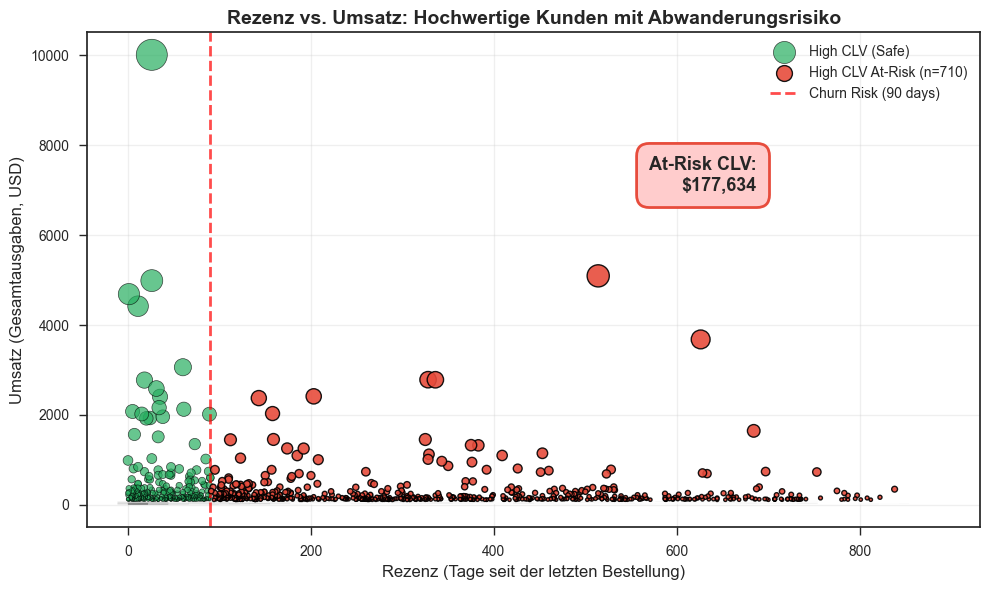

In [183]:
plt.figure(figsize=(10,6))

# 1. Density для Low/Medium
low_med = rfm[rfm['CLV_segment'].isin(['Low', 'Medium'])]
plt.hexbin(low_med['Recency_days'], low_med['Monetary_total'], 
           gridsize=40, cmap='Greys', alpha=0.5, mincnt=1, zorder=1)

# 2. High CLV - розділити на Safe vs At-Risk
high = rfm[rfm['CLV_segment'] == 'High']
high_safe = high[high['Recency_days'] <= 90]
high_risk = high[high['Recency_days'] > 90]

# Safe High CLV (зелені)
plt.scatter(high_safe['Recency_days'], high_safe['Monetary_total'], 
            c='#27ae60', s=high_safe['Monetary_total']/20, 
            alpha=0.7, edgecolor='black', linewidth=0.5, 
            label='High CLV (Safe)', zorder=2)

# At-Risk High CLV (червоні!) ← ЦЕ КЛЮЧОВЕ ДОДАВАННЯ
plt.scatter(high_risk['Recency_days'], high_risk['Monetary_total'], 
            c='#e74c3c', s=high_risk['Monetary_total']/20, 
            alpha=0.9, edgecolor='black', linewidth=1, 
            label=f'High CLV At-Risk (n={len(high_risk)})', zorder=3)

# 3. Додати risk threshold line
plt.axvline(x=90, color='red', linestyle='--', linewidth=2, 
            alpha=0.7, label='Churn Risk (90 days)')

# 4. КЛЮЧОВЕ: Annotation з CLV at stake
total_at_risk = high_risk['Monetary_total'].sum()
plt.text(0.75, 0.75, 
         f'At-Risk CLV:\n${total_at_risk:,.0f}',
         transform=plt.gca().transAxes,
         fontsize=13, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.7', 
                   facecolor='#ffcccc', 
                   edgecolor='#e74c3c', 
                   linewidth=2),
         verticalalignment='top',
         horizontalalignment='right')

plt.title("Rezenz vs. Umsatz: Hochwertige Kunden mit Abwanderungsrisiko", 
          fontsize=14, fontweight='bold')
plt.xlabel("Rezenz (Tage seit der letzten Bestellung)", fontsize=12)
plt.ylabel("Umsatz (Gesamtausgaben, USD)", fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**1.4 Cohort Retention Analysis**

In [102]:
###

## **PART 2: Bestell- & Umsatzanalyse**

**2.1 Bestellverteilung**

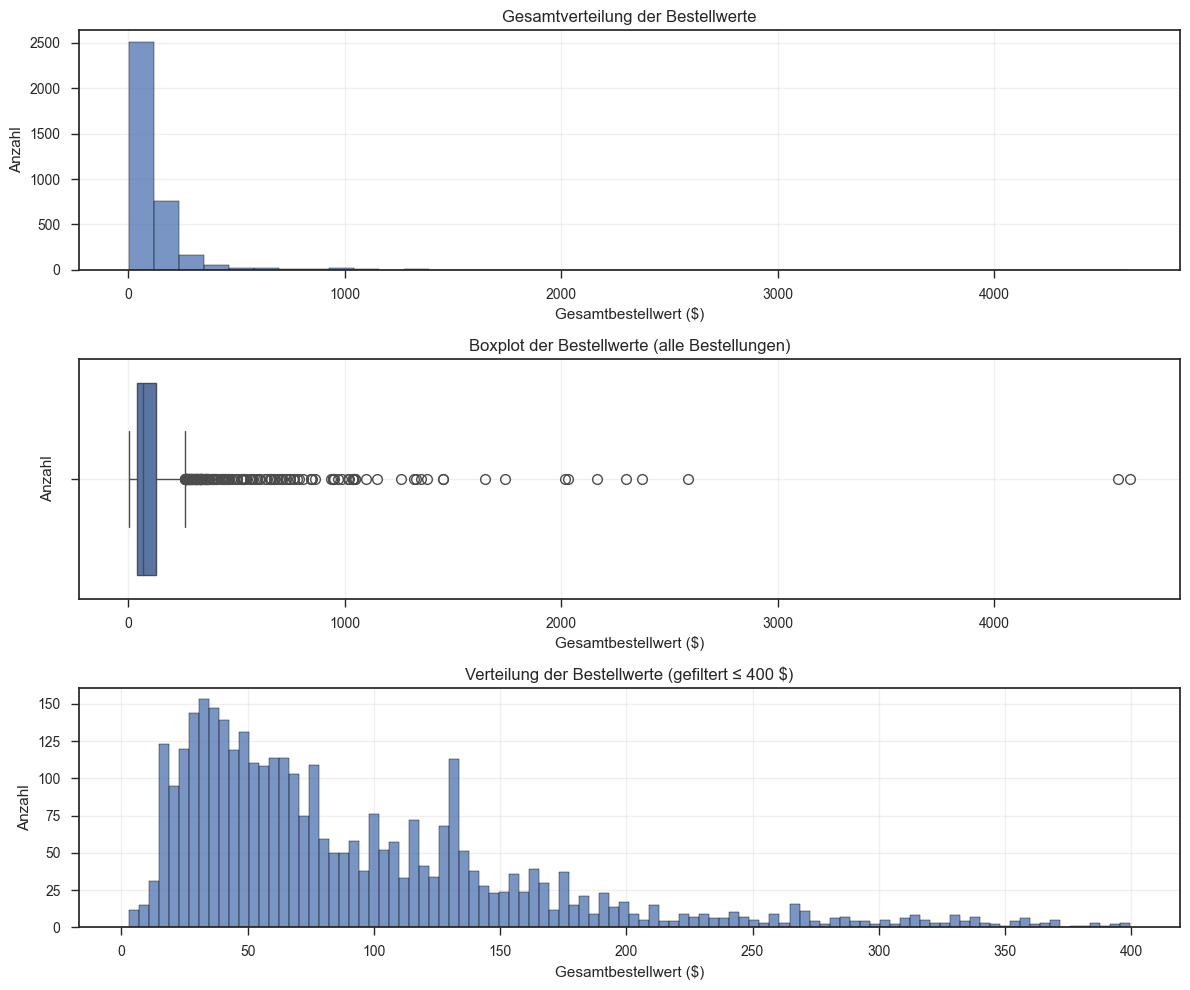

In [103]:
plt.figure(figsize=(12, 10))

# =================== 1. Histogram: all Orders.total 
plt.subplot(3, 1, 1)
sns.histplot(df_orders['Orders.total'], bins=40)
plt.title('Gesamtverteilung der Bestellwerte')
plt.ylabel("Anzahl")
plt.xlabel("Gesamtbestellwert ($)")
plt.grid(alpha=0.3)

# =================== 2. Boxplot: all Orders.total 
plt.subplot(3, 1, 2)
sns.boxplot(x=df_orders['Orders.total'])
plt.title('Boxplot der Bestellwerte (alle Bestellungen)')
plt.ylabel("Anzahl")
plt.xlabel("Gesamtbestellwert ($)")
plt.grid(alpha=0.3)

# =================== 3. Histogram: Orders.total <= 400 
plt.subplot(3, 1, 3)
sns.histplot(df_orders[df_orders['Orders.total'] <= 400]['Orders.total'], bins=100)
plt.title('Verteilung der Bestellwerte (gefiltert ≤ 400 $)')
plt.ylabel("Anzahl")
plt.xlabel("Gesamtbestellwert ($)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [104]:
### --- outliers investigation --- ORDERs!!!!!
#Filtered High-Value Orders ( >1500€ )

#df_orders[df_orders['Orders.total'] > 1500].sort_values(by='Orders.total', ascending=False)

print("----------------------------------------------------------------------\n")
print("                Hochwertige Bestellungen (über 1500 $)       \n")

df_orders[df_orders['Orders.total'] > 1500] \
    .sort_values(by='Orders.total', ascending=False) \
    [['Orders.id', 'Orders.customer_id', 'Orders.total', 'Orders.payment_amount' ]]


----------------------------------------------------------------------

                Hochwertige Bestellungen (über 1500 $)       



,Orders.id,Orders.customer_id,Orders.total,Orders.payment_amount
473,2144,442,4627.95,4627.95
2936,14924,3006,4575.00,4575.00
3129,15657,3234,2588.00,2588.00
2035,10729,2022,2375.59,2375.59
128,572,143,2300.00,2300.00
3083,15457,3174,2164.30,2164.30
1931,9742,1918,2031.93,2031.93
2510,12835,2539,2017.92,NaN
2511,12836,2540,1740.00,580.00
203,965,218,1647.06,1548.06


**2.2 Analyse des Bestellstatus**

In [105]:
print("-------------------------------------------------------\n")
print("               Bestellstatus nach Zahlungsstatus  \n")


ct_status = pd.crosstab(df_orders["Orders.status"], df_orders["Orders.payment_status"])
ct_status

-------------------------------------------------------

               Bestellstatus nach Zahlungsstatus  



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.status,,,,
Cancelled,13,11,0,0
Completed,3295,0,4,18
Error,1,0,0,0
On Hold,12,0,0,0
Pending,7,15,0,0
Refunded,101,9,1,0
Shipped,53,2,0,2
Unknown,3,1,0,0
Validation Required,17,0,0,0


In [106]:
df_orders["has_reorder"] = df_orders["Orders.reorder_id"].notna().astype(int)
df_orders["has_tax"] = (df_orders["Orders.tax"] > 0).astype(int)
#df_orders["has_shipping"] = (df_orders["Orders.shipping"] > 0).astype(int)
df_orders["has_coupon"] = df_orders["Orders.coupon_id"].notna().astype(int)
#
df_orders['has_shipping'] = df_orders['Orders.shipping'].fillna(0).gt(0).astype(int)
df_orders['no_shipping'] = df_orders['Orders.shipping'].fillna(0).le(0).astype(int)

# discount_name є завжди, але треба перевірити, чи там "No Discount", "" або NaN
df_orders["has_discount"] = df_orders["Orders.discount_name"].ne("No Discount").astype(int)

In [107]:
print("----------------------------------------------------------------------------------------\n")
print("                     Bestellstatus  nach  Bestellattribute  \n")

ct_attribute = df_orders.groupby("Orders.status", observed=True)[[
    "has_reorder",
    "has_tax",
    "has_shipping",
    "no_shipping",
    "has_coupon",
    "has_discount"
]].sum()

ct_attribute

----------------------------------------------------------------------------------------

                     Bestellstatus  nach  Bestellattribute  



,has_reorder,has_tax,has_shipping,no_shipping,has_coupon,has_discount
Orders.status,,,,,,
Cancelled,1,1,17,7,3,0
Completed,61,235,2322,995,598,258
Error,0,0,0,1,0,0
On Hold,0,1,7,5,2,3
Pending,0,2,9,13,3,1
Refunded,0,7,67,44,22,2
Shipped,1,12,41,16,5,3
Unknown,0,0,3,1,0,0
Validation Required,0,3,10,7,7,0


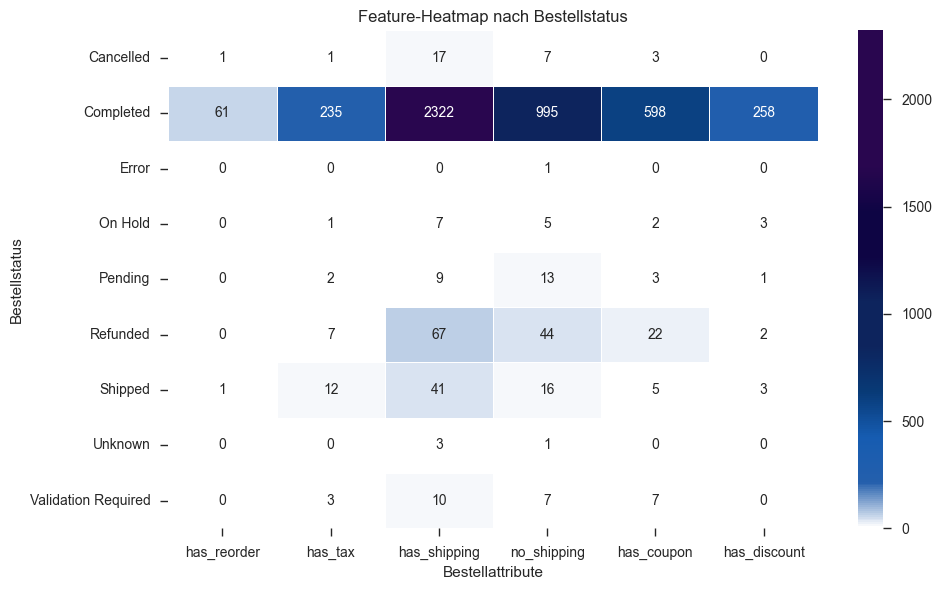

In [108]:
# from matplotlib.colors import LinearSegmentedColormap

colors = [
    "#ffffff",  # 0%
    "#245FAC",  # 10%
    "#165CB1",
    "#083A77",
    "#0D245D",  
    "#0D245D",  # 50%
    "#0E0544", 
    "#0E0544",
    "#29064F",  # 75%
    "#29064F",   
    "#29064F",   
    "#29064F",  # 100%         
]

custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)

plt.figure(figsize=(10, 6))
sns.heatmap(
    ct_attribute,
    annot=True,
    fmt="d",
    cmap=custom_cmap,
    linewidths=0.5,
    linecolor="white"
)

plt.title("Feature-Heatmap nach Bestellstatus")
plt.ylabel("Bestellstatus")
plt.xlabel("Bestellattribute")
plt.tight_layout()
plt.show()

**2.3 Zeitliche Trends**

In [261]:
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

overall_min = df[date_cols].min().min()
overall_max = df[date_cols].max().max()

overall_min, overall_max

(Timestamp('2013-12-03 16:45:39'), Timestamp('2016-05-16 18:04:02'))

In [265]:
df['Orders.placed_date'].min()

Timestamp('2013-12-03 17:07:35')

In [267]:
orders_2013 = df.loc[df['Orders.placed_date'].dt.year == 2013, 'Orders.id'].nunique()
orders_2013orders_unique = df.drop_duplicates(subset='Orders.id')

total_revenue_all = (
    orders_unique['Orders.total']
    .astype(float)
    .sum()
)

total_revenue_all

np.float64(411278.76)

In [109]:
df_orders['Orders.placed_date'] = pd.to_datetime(df_orders['Orders.placed_date'])

daily_sales = df_orders.groupby('Orders.placed_date')['Orders.total'].sum().sort_index()
weekly_sales = df_orders.resample('W', on='Orders.placed_date')['Orders.total'].sum()
monthly_sales = df_orders.resample('M', on='Orders.placed_date')['Orders.total'].sum()

C:\Users\Anna\AppData\Local\Temp\ipykernel_19268\943786263.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_orders.resample('M', on='Orders.placed_date')['Orders.total'].sum()


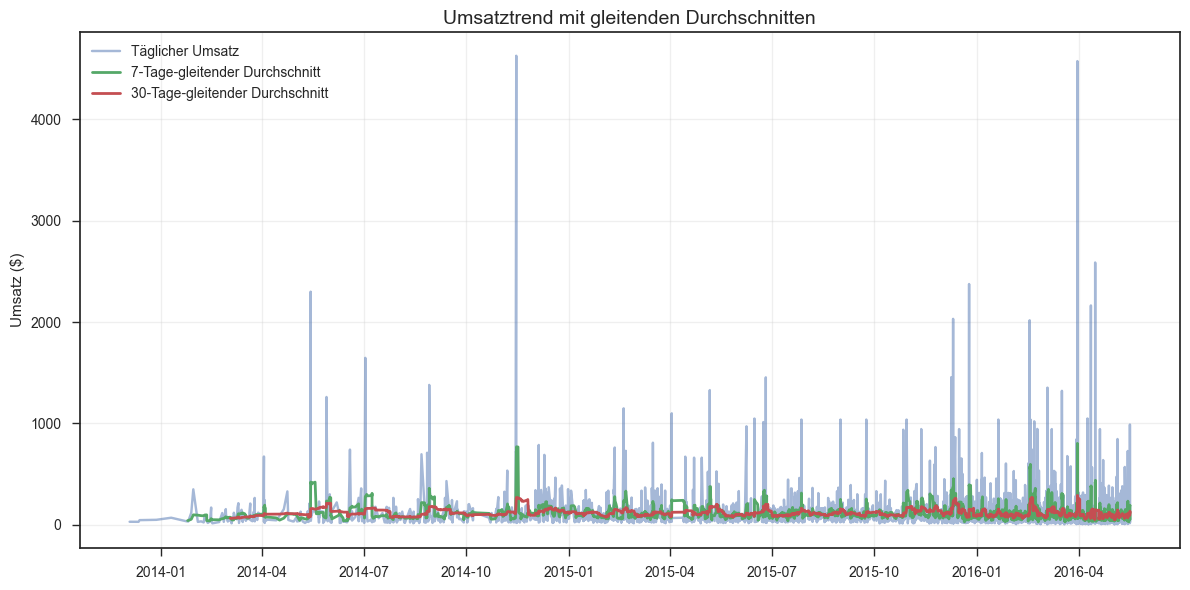

In [196]:
plt.figure(figsize=(12, 6))

# --- line daily  ---
plt.plot(daily_sales, label="Täglicher Umsatz", alpha=0.5)
# --- line 7 day / week ---
plt.plot(daily_sales.rolling(7).mean(), label="7-Tage-gleitender Durchschnitt", linewidth=2)
# --- line 30 day / month ---
plt.plot(daily_sales.rolling(30).mean(), label="30-Tage-gleitender Durchschnitt", linewidth=2)

plt.title("Umsatztrend mit gleitenden Durchschnitten", fontsize=14)
plt.xlabel("")
plt.ylabel("Umsatz ($)") #Revenue #дохід
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Moving averages демонструють чіткий тренд зростання продажів протягом 2014–2016 років.
Щоденні продажі характеризуються високою волатильністю через оптові замовлення, але 7-денне і 30-денне середнє показують стабільне збільшення середнього доходу.

In [111]:
df_orders['Orders.placed_date'] = pd.to_datetime(df_orders['Orders.placed_date'])

daily = df_orders.groupby(df_orders['Orders.placed_date'].dt.date)['Orders.total'].sum()
daily.index = pd.to_datetime(daily.index)

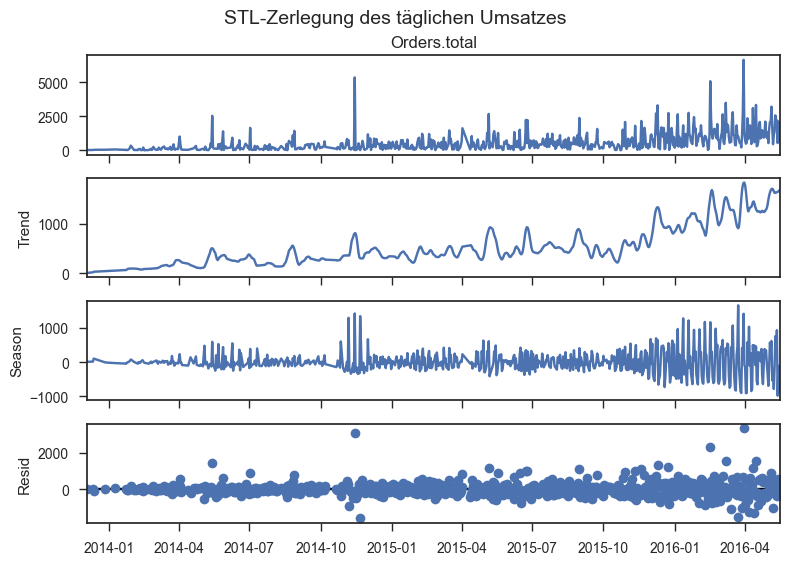

In [112]:
#from statsmodels.tsa.seasonal import STL

stl = STL(daily, period=7)
res = stl.fit()

#res.plot()
fig = res.plot()
#fig.suptitle("STL Decomposition of Daily Revenue", fontsize=14)
fig.suptitle("STL-Zerlegung des täglichen Umsatzes",
            fontsize=14,
            y=1.02
)
plt.show()

Підсумок у 4 реченнях (в проект.md)


Ця STL-декомпозиція розкладає щоденний дохід на тренд, сезонну компоненту та залишки (residuals). Дані показують чіткий зростаючий **тренд** продажів протягом 2014–2016 років.
Присутня стабільна тижнева сезонність, яка посилюється з часом.
Велика кількість аномальних днів пов’язана з великими B2B-замовленнями.
Ряд добре піддається трендовому аналізу, але важко моделюється ARIMA через сильні аномалії.

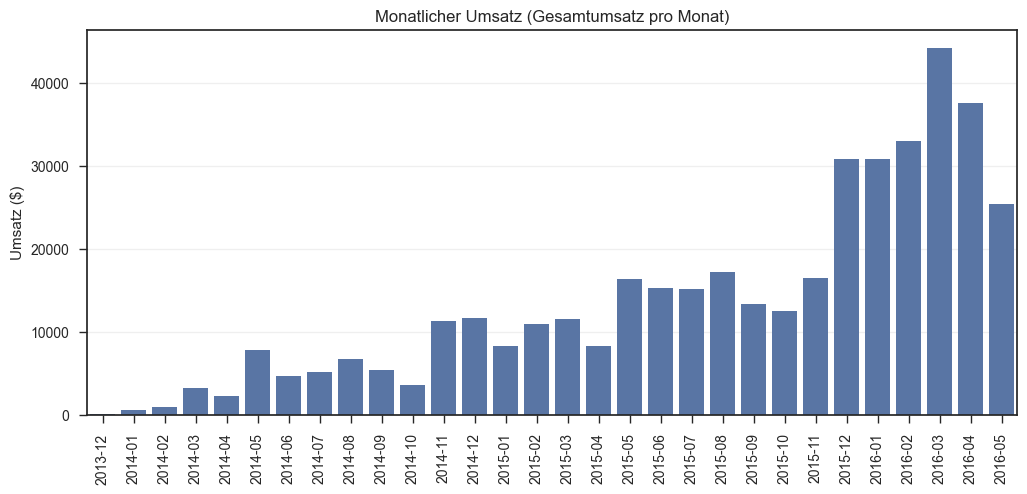

In [197]:
# --- Monthly Revenue from df_orders ---

df_orders['Orders.placed_date'] = pd.to_datetime(df_orders['Orders.placed_date'])

# Create year-month column
df_orders['year_month'] = df_orders['Orders.placed_date'].dt.to_period('M').astype(str)

# Aggregate revenue
monthly_revenue = (
    df_orders.groupby('year_month')['Orders.total']
    .sum()
    .reset_index()
)


plt.figure(figsize=(12, 5))
sns.barplot(
    data=monthly_revenue,
    x='year_month',
    y='Orders.total',
    #color='#4C72B0'
)

plt.xticks(rotation=90)
plt.title("Monatlicher Umsatz (Gesamtumsatz pro Monat)") #Monthly Revenue (Total Sales per Month)
plt.xlabel("")
plt.ylabel("Umsatz ($)") #Revenue
plt.grid(axis='y', alpha=0.3)

plt.show()


## **PART 3: Zahlungs- & Versandprozesse**

**3.1 Zahlungsanalyse**

In [114]:
print("--------------------------------------------------------\n")
print("              Zahlungsart nach Zahlungsstatus  \n")
ct_pay_method = pd.crosstab(df_orders["Orders.payment_method"], df_orders["Orders.payment_status"])
ct_pay_method

--------------------------------------------------------

              Zahlungsart nach Zahlungsstatus  



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.payment_method,,,,
Cash,2,0,0,0
Check,24,0,0,0
Credit Card,360,0,5,6
PayPal,281,0,0,0
authorize.net,2835,38,0,0


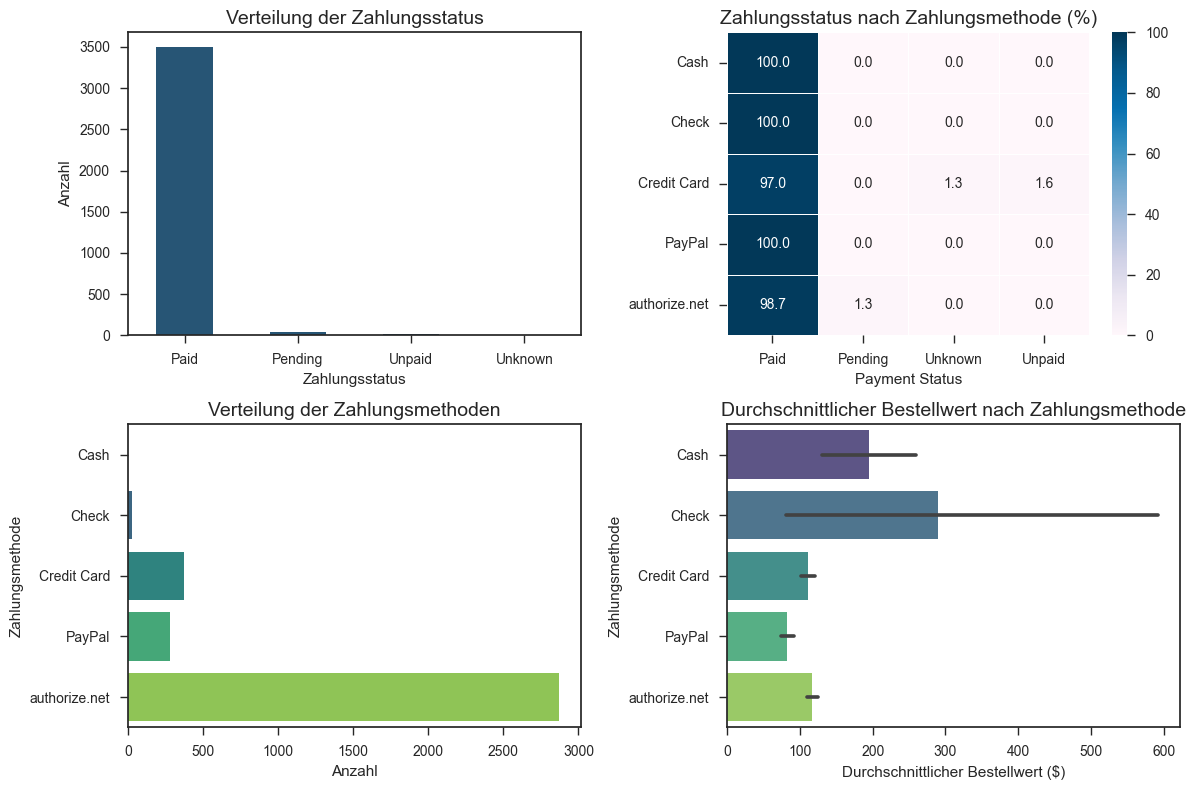

In [115]:
# --- Єдиний порядок payment_method для графіків 3 і 4 ---
method_order = sorted(df_orders['Orders.payment_method'].dropna().unique())

#===================
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# === 1. Payment Status Distribution ===
sns.countplot(
    data=df_orders,
    x='Orders.payment_status',
    order=df_orders['Orders.payment_status'].value_counts().index,
    ax=axes[0, 0],
    color="#1A5782",
    width=0.5 
 
)
axes[0, 0].set_title('Verteilung der Zahlungsstatus', fontsize=14) #Payment Status Distribution
axes[0, 0].set_xlabel('Zahlungsstatus')
axes[0, 0].set_ylabel('Anzahl')
axes[0, 0].tick_params(axis='x', rotation=0)


# === 2. Heatmap (Payment Status by Payment Method) ===
ct = pd.crosstab(df_orders['Orders.payment_method'],df_orders['Orders.payment_status'],
                 normalize='index') * 100

sns.heatmap(
    ct,
    annot=True,
    fmt=".1f",
    cmap='PuBu',
    linewidths=.5,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Zahlungsstatus nach Zahlungsmethode (%)', fontsize=14) #Payment Status by Payment Method (%)
axes[0, 1].set_xlabel('Payment Status')
axes[0, 1].set_ylabel(' ')


# === 3. Payment Method Distribution (HORIZONTAL, sorted!) ===
sns.countplot(
    data=df_orders,
    y='Orders.payment_method',     
    order=method_order,
    ax=axes[1, 0],
    hue='Orders.payment_method',
    palette="viridis",
    legend=False,
)
axes[1, 0].set_title('Verteilung der Zahlungsmethoden', fontsize=14) #Payment Method Distribution
axes[1, 0].set_xlabel('Anzahl')
axes[1, 0].set_ylabel('Zahlungsmethode')
axes[1, 0].tick_params(axis='y', rotation=0)


# === 4. Average Order Total by Payment Method (HORIZONTAL) ===
sns.barplot(
    data=df_orders,
    y='Orders.payment_method',     
    x='Orders.total',
    estimator='mean',
    order=method_order,
    ax=axes[1, 1],
    hue='Orders.payment_method',
    palette="viridis",
    legend=False,
    alpha=0.9
)
axes[1, 1].set_title('Durchschnittlicher Bestellwert nach Zahlungsmethode', fontsize=14) #Average
axes[1, 1].set_xlabel('Durchschnittlicher Bestellwert ($)') #Average Order Total
axes[1, 1].set_ylabel('Zahlungsmethode')
axes[1, 1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


confidence intervals - довірчі інтервали які seaborn додає за замовчуванням до barplot.
Вони показують:
Наскільки надійна оцінка середнього значення
Наявність варіації / розкиду даних в групі
Якщо лінія дуже довга - дані сильно варіюються (великий розкид значень)
Якщо коротка - середня оцінка стабільна.

authorize.net  - payment gateway in USA ()

**3.2 Versand & Logistik**

In [116]:
df_clean = df_orders.dropna(subset=[
    "Orders.shipping_carrier",
    "Orders.shipping_method"
])

df_clean["shipping_paid"] = (df_clean["Orders.shipping"] > 0).astype(int)

ct_carrier = pd.crosstab(df_clean["Orders.shipping_carrier"],
                          df_clean["shipping_paid"]
)
ct_carrier

C:\Users\Anna\AppData\Local\Temp\ipykernel_19268\1907727588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["shipping_paid"] = (df_clean["Orders.shipping"] > 0).astype(int)


shipping_paid,0,1
Orders.shipping_carrier,,
FEDX,0,1
HWEP,0,1
INTF,0,1
MT03,0,1
NDSN,1,0
NSVA,1,0
RDWY,0,1
WTVA,1,1
fedex,375,1628


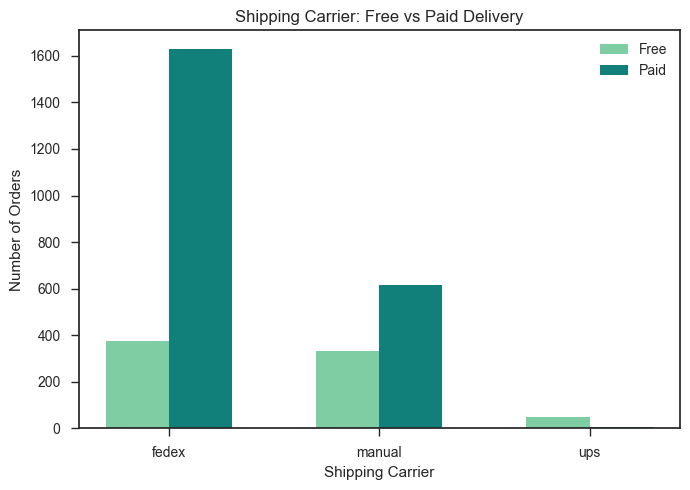

In [ ]:
ct_carrier = pd.crosstab(
    df_clean["Orders.shipping_carrier"],
    df_clean["shipping_paid"]
)

main_methods = ["fedex", "manual", "ups"]
ct_main = ct_carrier.loc[main_methods]

free = ct_main[0].values
paid = ct_main[1].values
methods = ct_main.index.tolist()

x = np.arange(len(methods))
width = 0.3

plt.figure(figsize=(7, 5))

plt.bar(x - width/2, free, width, label="Free", color="#7FCDA2")
plt.bar(x + width/2, paid, width, label="Paid", color="#12807A")

plt.xticks(x, methods)
plt.ylabel("Number of Orders")
plt.xlabel("Shipping Carrier")
plt.title("Shipping Carrier: Free vs Paid Delivery")
plt.legend()

plt.tight_layout()
plt.show()


In [118]:
ct_method = pd.crosstab(
    df_clean["shipping_paid"],
    df_clean["Orders.shipping_method"]
)
ct_method.T

shipping_paid,0,1
Orders.shipping_method,,
FEDERAL EXPRESS CORP.,0,1
Free Shipping,300,6
Ground,375,1628
"HOWARD'S EXPRESS, INC.",0,1
INTERNATIONAL FEDEX,0,1
MEDTRANS,0,1
NATIONAL DELIVERY,1,0
NATIONAL DELIVERY SYSTEMS,1,0
ROADWAY EXPRESS,0,1


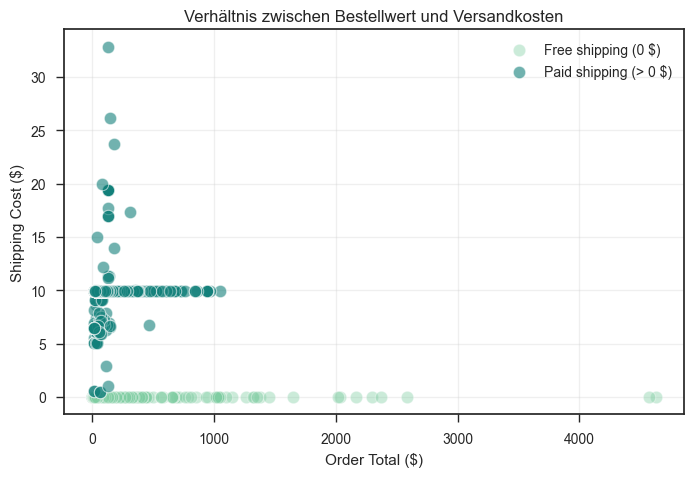

In [199]:
plt.figure(figsize=(8, 5))

# --- Shipping = 0 (free) ---
sns.scatterplot(
    data=df_orders[df_orders["Orders.shipping"] == 0],
    x="Orders.total",
    y="Orders.shipping",
    color="#7FCDA2",
    s=80,
    alpha=0.4,
    label="Free shipping (0 $)"
)

# --- Shipping > 0 (paid) ---
sns.scatterplot(
    data=df_orders[df_orders["Orders.shipping"] > 0],
    x="Orders.total",
    y="Orders.shipping",
    color="#12807A",
    s=80,
    alpha=0.6,
    label="Paid shipping (> 0 $)"
)

plt.xlabel("Order Total ($)")
plt.ylabel("Shipping Cost ($)")
plt.title("Verhältnis zwischen Bestellwert und Versandkosten")
plt.grid(True, alpha=0.3)
plt.legend(loc="upper right")

plt.show()


## **PART 4: Produkt- & Profitabilitätsanalyse**

**4.1 Produktverteilung**

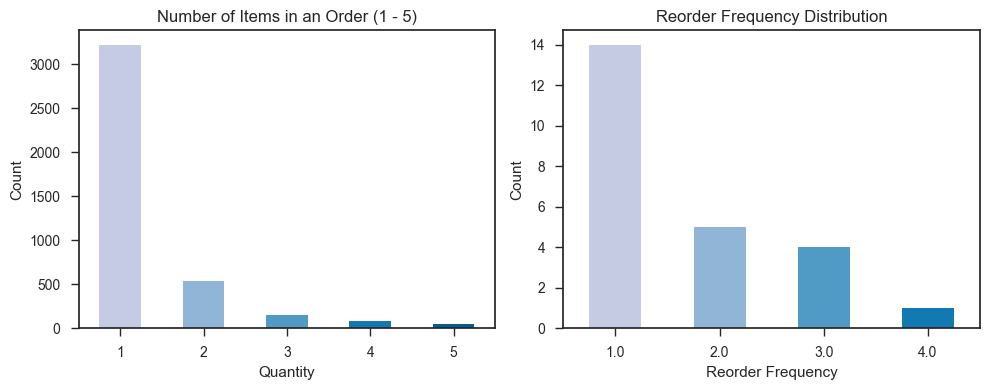

In [120]:
colors = sns.color_palette("PuBu", n_colors=6)[1:]

#===================
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#=================== 1. Кількість товарів у замовленні (1–5)
small_qty = df[df['Order_Items.qty'] <= 5]

small_qty['Order_Items.qty'] \
    .value_counts() \
    .sort_index() \
    .plot(kind='bar', color=colors, ax=axes[0])

axes[0].set_title('Number of Items in an Order (1 - 5)')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

#=================== 2. Частота повторного замовлення
(df_items[df_items['Order_Items.reorder_frequency'].notna()]
    ['Order_Items.reorder_frequency']
    .value_counts()
    .sort_index()
    .plot(kind='bar', color=colors, ax=axes[1]))

axes[1].set_title('Reorder Frequency Distribution')
axes[1].set_xlabel('Reorder Frequency')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


**4.2 Preis- & Margenanalyse**

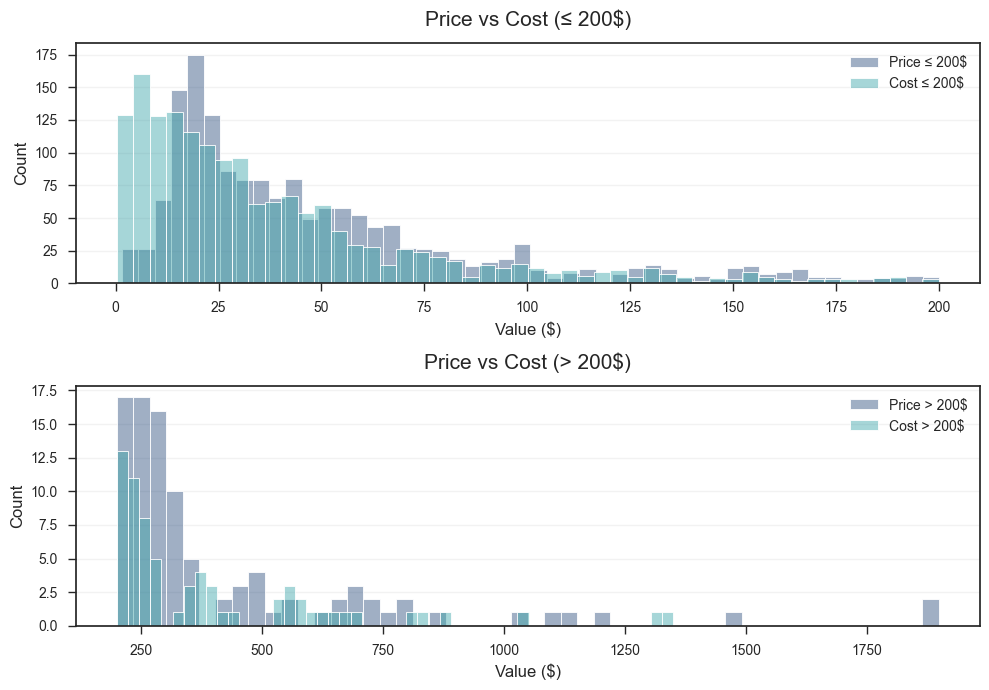

In [121]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=False)

#=================== TOP subplot: ≤ 200$ ===
sns.histplot(
    df_products[(df_products["Products.price"].notna()) &
                (df_products["Products.price"] <= 200)],
    x="Products.price",
    bins=50,
    color="#2C4E7E",
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[0]
)

sns.histplot(
    df_products[(df_products["Products.cost"].notna()) &
                (df_products["Products.cost"] <= 200)],
    x="Products.cost",
    bins=50,
    color="#3BA4A9",
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[0]
)

axes[0].set_title("Price vs Cost (≤ 200$)", fontsize=15, pad=12)
axes[0].set_xlabel("Value ($)", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].grid(axis='y', alpha=0.25)
axes[0].legend(["Price ≤ 200$", "Cost ≤ 200$"])


#=================== BOTTOM subplot: > 200$ ===
sns.histplot(
    df_products[(df_products["Products.price"].notna()) &
                (df_products["Products.price"] > 200)],
    x="Products.price",
    bins=50,
    color="#2C4E7E",
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[1]
)

sns.histplot(
    df_products[(df_products["Products.cost"].notna()) &
                (df_products["Products.cost"] > 200)],
    x="Products.cost",
    bins=50,
    color="#3BA4A9",
    alpha=0.45,
    edgecolor="white",
    linewidth=0.6,
    ax=axes[1]
)

axes[1].set_title("Price vs Cost (> 200$)", fontsize=15, pad=12)
axes[1].set_xlabel("Value ($)", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].grid(axis='y', alpha=0.25)
axes[1].legend(["Price > 200$", "Cost > 200$"])


plt.tight_layout()
plt.show()


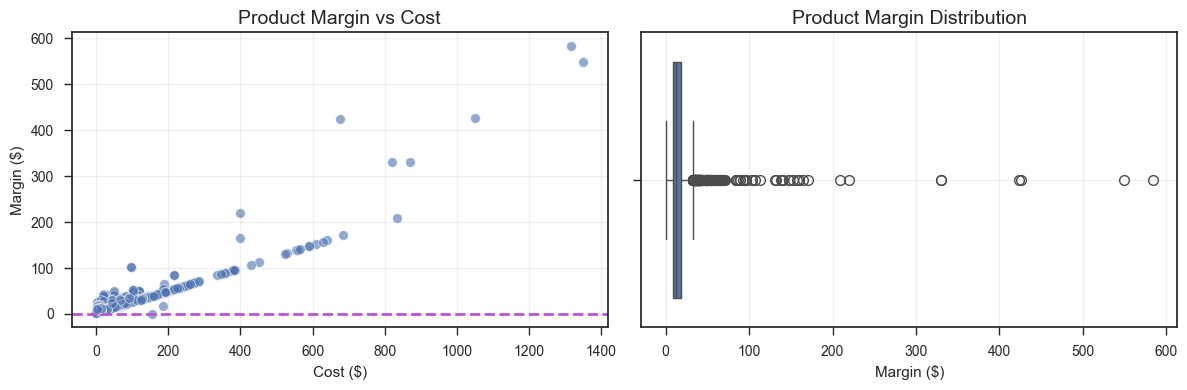

In [226]:
df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]

#===================
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axes


# === 1. Scatter: Margin vs Cost ===
sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="margin",
    alpha=0.6,
   # color="#4472C4",
    ax=ax1
)

ax1.axhline(0, color="mediumorchid", linestyle="--", linewidth=2)
ax1.set_title("Product Margin vs Cost", fontsize=14)
ax1.set_xlabel("Cost ($)")
ax1.set_ylabel("Margin ($)")
ax1.grid(alpha=0.3)


# === 2. Line plot: Sorted Margin Curve ===
#diff_sorted = df_products["margin"].dropna().sort_values().reset_index(drop=True)

sns.boxplot(
    x=df_products["margin"],
    ax=ax2
)

ax2.set_title("Product Margin Distribution", fontsize=14)
ax2.set_xlabel("Margin ($)")
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

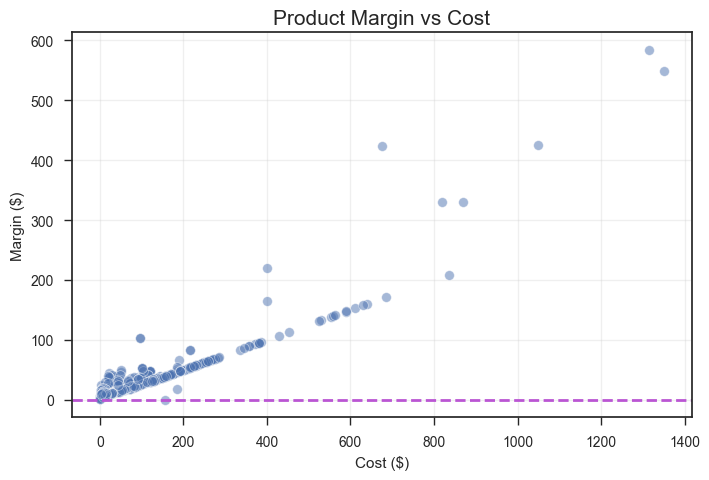

In [233]:
# separately for prasentation

df_products["margin"] = df_products["Products.price"] - df_products["Products.cost"]

plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df_products,
    x="Products.cost",
    y="margin",
    alpha=0.5
)

plt.axhline(0, color="mediumorchid", linestyle="--", linewidth=2)  # лінія нульової маржі

plt.title("Product Margin vs Cost", fontsize=15)
plt.xlabel("Cost ($)")
plt.ylabel("Margin ($)")
plt.grid(alpha=0.3)
plt.show()


**4.3 Top-Performer**

In [123]:
top_margin = (
    df_products[["Products.name", "Products.price", "Products.cost", "margin"]]
    .sort_values(by="margin", ascending=False)
    .head(10)
)

top_margin.sort_values('margin')

,Products.name,Products.price,Products.cost,margin
1100,Bellavita Auto Bath Tub Chair Seat Lift,565.00,399.99,165.01
889,CircuFlow Lymphedema Pumps,855.14,684.11,171.03
571,Deluxe Sentra Heavy Duty Extra Extra Wide Whee...,1043.75,835.00,208.75
1323,Hydraulic Patient Lift with Six Point Cradle,620.00,399.99,220.01
365,"Phoenix Heavy Duty Power Scooter, 3 Wheel",1149.00,819.00,330.00
452,"Phoenix Heavy Duty Power Scooter, 4 Wheel",1199.00,869.00,330.00
1708,Spitfire EX Compact Travel Power Mobility Scoo...,1099.00,675.00,424.00
119,Titan Transportable Front Wheel Power Wheelchair,1475.00,1049.00,426.00
884,Cirrus Plus EC Folding Power Wheelchair,1899.00,1350.00,549.00
1211,Battery Powered Electric Patient Lift with Rec...,1899.00,1315.00,584.00


In [124]:
# 1 = реалізований, 0 = ні
realized_statuses = ['Completed','Shipped']
df['order_realized'] = (df['Orders.status'].isin(realized_statuses)).astype(int)

# item_margin
df['item_margin'] = (df['Order_Items.price'] - df['Order_Items.cost']) * df['Order_Items.qty']

# топ-10 продуктів за сумарним обсягом продажів ($)
top_products_realized = (
    (df[df['order_realized'] == 1])
    .groupby(['Products.id', 'Products.name'], as_index=False)
    .agg(
        total_sales=('Order_Items.price', 'sum'),
        quantity_sold=('Order_Items.qty', 'sum'),
        total_margin=('item_margin', 'sum')   # зароблена маржа
    )
    .sort_values('total_sales', ascending=False)
)

top_products_realized.head(10)

,Products.id,Products.name,total_sales,quantity_sold,total_margin
253,911.0,"Aluminum Transport Chair with 12"" Wheels,Red,F...",8222.44,67,1839.42
252,910.0,"Aluminum Transport Chair with 12"" Wheels,Blue,...",8048.41,66,1762.51
217,858.0,K1 Basic Extra-Wide Wheelchairs,6226.24,55,1036.95
598,1867.0,Silent Knight Pill Crushers,3906.63,59,1157.84
652,2107.0,"MoliCare Disposable Super Plus Briefs,27""-47""",3798.96,224,2259.30
786,2673.0,"Spitfire Scout Compact Travel Power Scooter, 4...",3634.99,5,689.99
203,837.0,K1 Basic Wheelchairs,2861.81,27,662.58
951,4124.0,"Whisper Ultra Quiet Bath Lift, Blue",2629.79,7,376.79
216,857.0,2000 Wheelchairs,2568.75,18,616.50
237,890.0,Extra-Wide Wheelchairs,2290.00,8,458.00


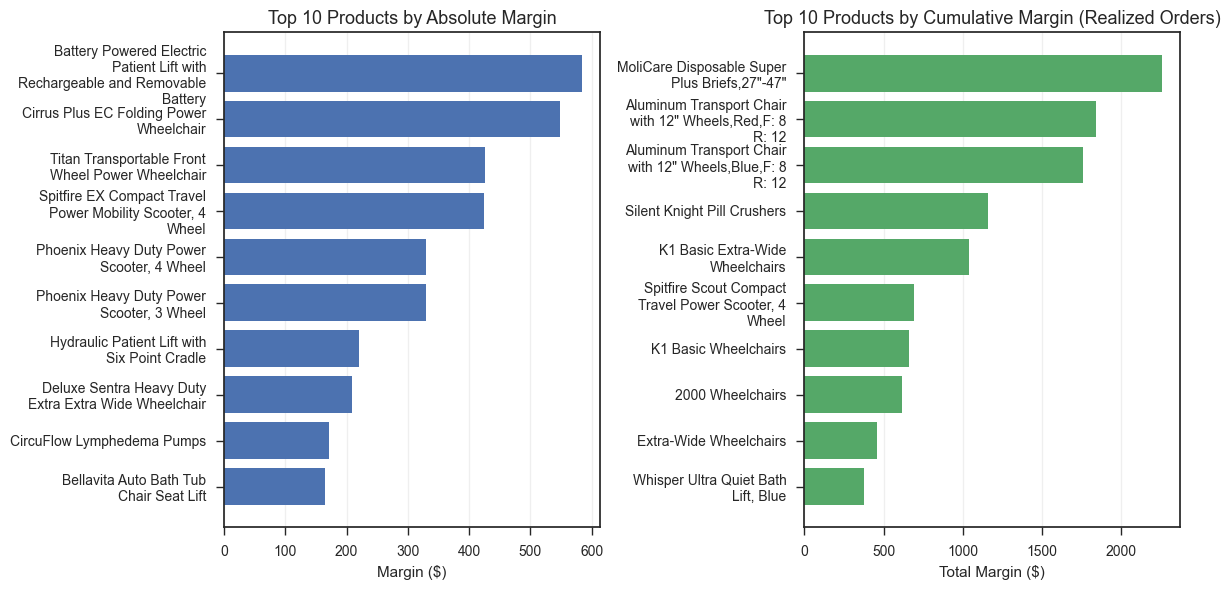

In [272]:
top_margin_10 = top_margin.sort_values('margin')
top_marginsales_10 = top_products_realized.head(10).sort_values('total_margin')

#import textwrap
def wrap_labels(labels, width=28):
    return [textwrap.fill(label, width) for label in labels]

#===================
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ---------- LEFT: Top Margin ----------
axes[0].barh(
    wrap_labels(top_margin_10['Products.name']),
    top_margin_10['margin'],
    color="#4C72B0"
)
axes[0].set_title('Top 10 Products by Absolute Margin', fontsize=13)
axes[0].set_xlabel('Margin ($)')
axes[0].set_ylabel('')
axes[0].grid(axis='x', alpha=0.3)

# ---------- RIGHT: Top Sales ----------
axes[1].barh(
    wrap_labels(top_marginsales_10['Products.name']),
    top_marginsales_10['total_margin'],
    color="#55A868"
)
axes[1].set_title('Top 10 Products by Cumulative Margin (Realized Orders)', fontsize=13)
axes[1].set_xlabel('Total Margin ($)')
axes[1].set_ylabel('')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

**4.4 Lieferantenanalyse**

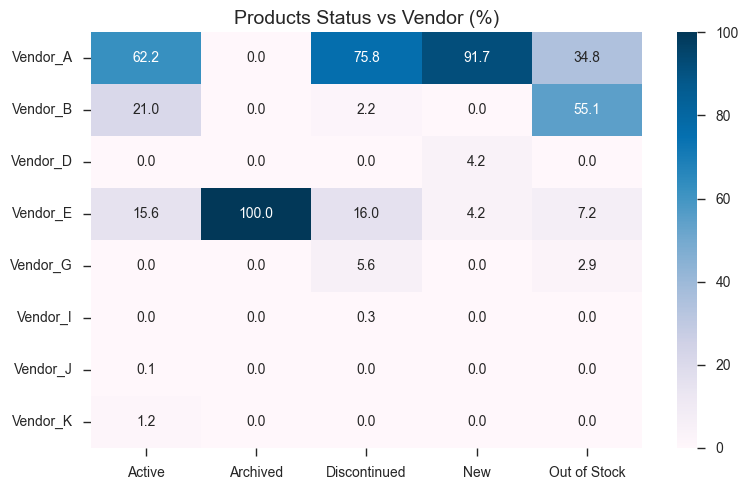

In [126]:
cr_vendor_prod = pd.crosstab(df_products['Products.status'], 
                       df_products['Products.vendor'],
                       normalize='index') * 100
#cr_vendor_prod.round(1)


plt.figure(figsize=(8, 5))
sns.heatmap(
    cr_vendor_prod.T, 
    cmap="PuBu", 
    annot=True, 
    fmt=".1f"
)

plt.title("Products Status vs Vendor (%)", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

## **PART 5: Prädiktive Analytik & Modellierung**

**5.1 Margenprognosemodelle**

In [127]:
model_vend = smf.ols(
    formula = '''
        Q("margin") ~
        C(Q("Products.vendor"))
    ''',
    data=df_products
)

results_vend = model_vend.fit()
print(results_vend.summary())

                            OLS Regression Results                            
Dep. Variable:            Q("margin")   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     15.08
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           3.20e-19
Time:                        22:10:58   Log-Likelihood:                -8285.4
No. Observations:                1709   AIC:                         1.659e+04
Df Residuals:                    1701   BIC:                         1.663e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [128]:
threshold = df_products['margin'].quantile(0.90)

df_products['high_margin'] = (df_products['margin'] >= threshold).astype(int)

print(df_products['high_margin'].value_counts())

# plt.figure(figsize=(4, 3))
# sns.countplot(data=df_products, x='high_margin')
# plt.title("Count of Products by Margin Segment")
# plt.xlabel("High Margin (1 = Top segment)")
# plt.show()

high_margin
0    1539
1     171
Name: count, dtype: int64


In [129]:
logit_model = smf.logit(
    formula='''
        high_margin ~
        Q("Products.price") +
        C(Q("Products.vendor")) 

    ''',
    data=df_products
)

logit_results = logit_model.fit()
print(logit_results.summary())

         Current function value: 0.078967
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            high_margin   No. Observations:                 1709
Model:                          Logit   Df Residuals:                     1700
Method:                           MLE   Df Model:                            8
Date:                Wed, 17 Dec 2025   Pseudo R-squ.:                  0.7572
Time:                        22:10:58   Log-Likelihood:                -134.96
converged:                      False   LL-Null:                       -555.79
Covariance Type:            nonrobust   LLR p-value:                2.151e-176
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -7.6279      0.538    -14.172      0.000      -8.683   

c:\Anna-Project\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


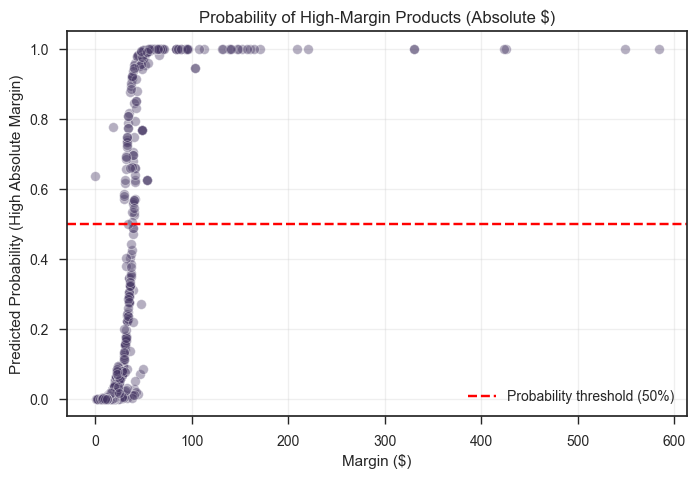

In [234]:
df_products['prob_high_margin'] = logit_results.predict(df_products)

plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df_products,
    x='margin',
    y='prob_high_margin',
    alpha=0.4,
    color = "#463764"
)

plt.axhline(0.5, linestyle='--', color="red", label='Probability threshold (50%)')

plt.xlabel('Margin ($)')
plt.ylabel('Predicted Probability (High Absolute Margin)')
plt.title('Probability of High-Margin Products (Absolute $)')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

**5.2 Nachbestellprognosemodelle (reorder)**

In [131]:
#import statsmodels.formula.api as smf
# 

rfm['made_reorder'] = (rfm['Frequency_orders'] > 1).astype(int)

#додаємо бізнес ознаку

# rfm = rfm.merge(
#     df_customers[['Customers.id', 'is_business']],
#     on='Customers.id',
#     how='left'
# ) 
rfm = rfm.merge(
    df[['Customers.id', 'is_business']]
        .drop_duplicates(subset='Customers.id'),
    on='Customers.id',
    how='left'
)

In [132]:
model2 = smf.logit(
    formula='made_reorder ~ Recency_days + Monetary_total',
    data=rfm
)

results2 = model2.fit()
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.223257
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           made_reorder   No. Observations:                 3054
Model:                          Logit   Df Residuals:                     3051
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Dec 2025   Pseudo R-squ.:                  0.1539
Time:                        22:10:58   Log-Likelihood:                -681.83
converged:                       True   LL-Null:                       -805.85
Covariance Type:            nonrobust   LLR p-value:                 1.366e-54
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.9366      0.122    -24.094      0.000      -3.176      -2.698
Recency_days     

In [133]:
model3 = smf.logit(
    formula='made_reorder ~ Recency_days + Monetary_total + is_business',
    data=rfm
)
results3 = model3.fit()
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.223085
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           made_reorder   No. Observations:                 3054
Model:                          Logit   Df Residuals:                     3050
Method:                           MLE   Df Model:                            3
Date:                Wed, 17 Dec 2025   Pseudo R-squ.:                  0.1546
Time:                        22:10:59   Log-Likelihood:                -681.30
converged:                       True   LL-Null:                       -805.85
Covariance Type:            nonrobust   LLR p-value:                 1.022e-53
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.9064      0.125    -23.264      0.000      -3.151      -2.662
is

In [134]:
mean_monetary = rfm['Monetary_total'].mean()
mean_business = rfm['is_business'].mean()

In [135]:
X = pd.Series(range(rfm['Recency_days'].min(), rfm['Recency_days'].max() + 1))

X_df = pd.DataFrame({
    'Recency_days': X,
    'Monetary_total': mean_monetary,
    'is_business': mean_business
})

In [136]:
X_df['is_business'] = X_df['is_business'].round().astype(bool)


p_y = results3.predict(X_df) 

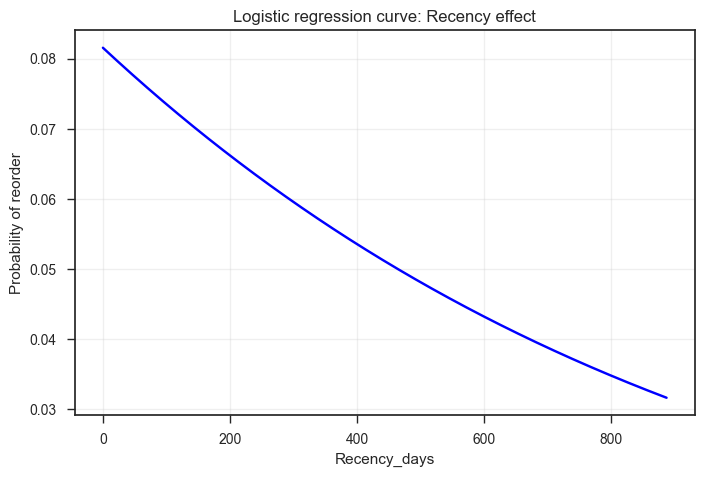

In [164]:
#===================
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(X, p_y, color='blue')


ax.set_title("Logistic regression curve: Recency effect")
ax.set_xlabel("Recency_days")
ax.set_ylabel("Probability of reorder")
ax.grid(alpha=0.3)

plt.show()

### **PART 6: Zentrale Erkenntnisse & Fazit**

6.1 Zusammenfassung der wichtigsten Ergebnisse

6.2 Analytische Erkenntnisse

6.3 Methodische Einschränkungen

6.4 Weiterführende Analysen / Nächste Schritte

In [138]:
###

In [139]:
model_results = pd.DataFrame({
    'Model': [
        'OLS: Margin ~ Vendor',
        'Logistic: High-Margin ~ Vendor',
        'Logistic: Reorder ~ Recency',
        'Logistic: Reorder ~ Recency + Monetary',
        'Logistic: Reorder ~ Full Model'
    ],
    'R² / Pseudo R²': [
        0.058,
        0.75,
        0.007,
        0.154,
        0.21
    ],
    'Interpretation': [
        'Vendor explains little variation in margin',
        'Vendor strongly predicts high-margin products',
        'Recency alone has almost no predictive power',
        'Monetary value significantly improves prediction',
        'Business customers reorder more frequently'
    ]
})
model_results

,Model,R² / Pseudo R²,Interpretation
0,OLS: Margin ~ Vendor,0.058,Vendor explains little variation in margin
1,Logistic: High-Margin ~ Vendor,0.750,Vendor strongly predicts high-margin products
2,Logistic: Reorder ~ Recency,0.007,Recency alone has almost no predictive power
3,Logistic: Reorder ~ Recency + Monetary,0.154,Monetary value significantly improves prediction
4,Logistic: Reorder ~ Full Model,0.210,Business customers reorder more frequently


**Weiterarbeit**

In [140]:
whos

Variable                  Type                        Data/Info
---------------------------------------------------------------
LinearSegmentedColormap   type                        <class 'matplotlib.colors<...>LinearSegmentedColormap'>
STL                       type                        <class 'statsmodels.tsa.stl._stl.STL'>
X                         Series                      Shape: (888,)
X_df                      DataFrame                   Shape: (888, 3)
ax                        Axes                        Axes(0.125,0.11;0.775x0.77)
ax1                       Axes                        Axes(0.0640509,0.169028;0.446446x0.737639)
ax2                       Axes                        Axes(0.538657,0.169028;0.446446x0.737639)
axes                      ndarray                     2: 2 elems, type `object`, 16 bytes
business_revenue          float64                     102538.42000000001
category_cols             list                        n=10
col                       str     